In [2]:
import matplotlib.pyplot as plt
from MNIST import label_set, batch_data_iter
from MultilabelPerceptron import *
from MultilabelKernelPerceptron import *
from sklearn.kernel_approximation import Nystroem
from KMeans import compress as kmean_compress
from tqdm import tqdm
import json

/nix/store/1mhabzbhfd5jxri8jfyrslbl6w2bb38c-python3-3.9.6-env/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /build/source/torch/csrc/utils/tensor_numpy.cpp:174.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [9]:
# (x_train, y_train), (x_test, y_test) = batch_data_iter(10_000, 500)
epochs = list(range(1, 11))
degrees = list(range(1, 7))

In [7]:
def scatter(c):
	x, y = zip(*[(e, d) for e in epochs for d in degrees])
	sc = plt.scatter(x, y, c=c, cmap="YlOrRd")
	cb = plt.colorbar(sc)
	cb.set_label("Test error")
	plt.xlabel("Epochs")
	plt.ylabel("Degree")
	plt.show()

## Kernel perceptron

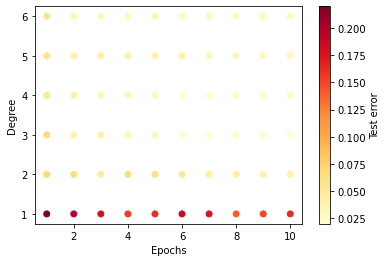

In [48]:
kmp = json.load(open("./results/mkp.json"))
errors = [kmp["epochs"][str(e)]["degree"][str(d)]["test_error"] for e in epochs for d in degrees]

scatter(errors)

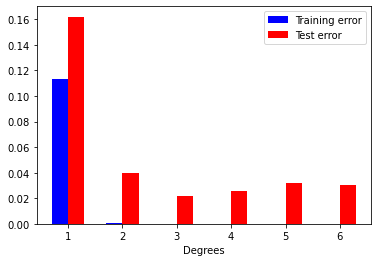

In [49]:
w = 0.3

training_errors = [kmp["epochs"]["10"]["degree"][str(d)]["training_error"] for d in degrees]
test_errors = [kmp["epochs"]["10"]["degree"][str(d)]["test_error"] for d in degrees]

ax = plt.subplot(111)
plt.xticks([d + w / 2 for d in degrees], degrees)
tre = ax.bar(degrees, training_errors, width=w, color="b", align="center")
tee = ax.bar([d + w for d in degrees], test_errors, width=w, color="r", align="center")
plt.legend([tre, tee], ["Training error", "Test error"])
plt.xlabel("Degrees")
plt.show()

## Perceptron

In [8]:
perceptron = json.load(open("./results/mp.json"))
errors = [perceptron["epochs"][str(e)]["test_error"] for e in epochs]

p = plt.plot(epochs, errors, marker='o', linestyle='--', linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Test error")
plt.show()

KeyError: 'epochs'

## Nystrom

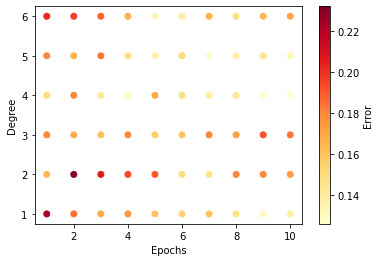

In [109]:
nystrom = json.load(open("./results/nmp.json"))
errors = [nystrom["degree"][str(d)]["epochs"][str(e)]["error"] for e in epochs for d in degrees]

scatter(errors)

## K-means

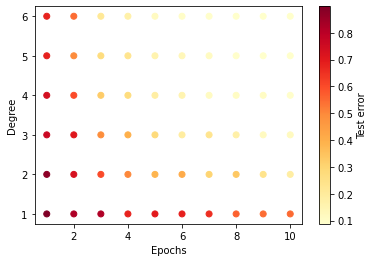

In [43]:
kmeans = json.load(open("./results/kmmkp.json"))
errors = [kmeans["epochs"][str(e)]["degree"][str(d)]["test_error"] for e in epochs for d in degrees]

scatter(errors)

Show the difference between test and training error, fixing the epochs at 10

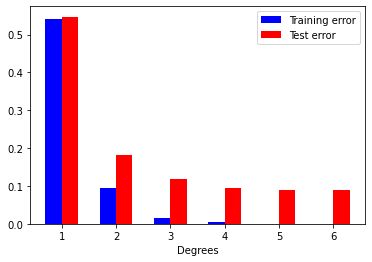

In [42]:
w = 0.3

training_errors = [kmeans["epochs"]["10"]["degree"][str(d)]["training_error"] for d in degrees]
test_errors = [kmeans["epochs"]["10"]["degree"][str(d)]["test_error"] for d in degrees]

ax = plt.subplot(111)
plt.xticks([d + w / 2 for d in degrees], degrees)
tre = ax.bar(degrees, training_errors, width=w, color="b", align="center")
tee = ax.bar([d + w for d in degrees], test_errors, width=w, color="r", align="center")
plt.legend([tre, tee], ["Training error", "Test error"])
plt.xlabel("Degrees")
plt.show()